In [1]:
import numpy as np
from numpy import sin,cos,tan
from math import pi
from IPython.display import clear_output
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import tan,cos
import random
sns.set()

#logitud de la placa: A
#separacion interplaca: s
#altura del poste: h



# def p_out(bet,alp,psi):
#     bet,alp,psi = conv*bet,conv*alp,conv*psi
#     bet = alp
#     #primera placa 
#     P1 = A*sin(pi - psi - alp)
#     #segunda placa con sombra
#     P2 = ratio(bet,alp,psi)*sin(pi - psi - bet)
#     return P1 + P2

def potencia_iterativa(bet,psi):
    # bet,psi = conv*np.array(bet),conv*psi
    P = []
    S = [1]
    P.append(A*sin(pi - conv*psi - conv*bet[0]))
    for i in range(len(bet)-1):
        P.append(A*ratio(bet[i+1],bet[i],psi)*sin(pi - conv*psi - conv*bet[i+1]))
        S.append(ratio(bet[i+1],bet[i],psi))
    return P

def plot_placa(alpha,N,phi):
    alpha = alpha*conv
    phi = phi*conv
    plt.vlines(x=A+N*s, ymin=0, ymax=h, linewidth=5, color='black')
    x = np.linspace(A-0.5*A*cos(alpha),A+0.5*A*cos(alpha),100)     
    n = 3 - 4*tan(alpha)
    y_ = tan(alpha)*x+ n
    
    
    plt.plot(x+N*s,y_, linewidth=5, color='black')
    plt.plot(np.linspace(-100,100,100) + N*s ,
             -tan(phi)*np.linspace(-100,100,100) + y_[-1] + tan(phi)*x[-1],
             linewidth=2, 
             color='orange',alpha = 0.3)

In [168]:
angulos = [10,15]
potencia_iterativa(angulos,10)

[1.368080573302674, 1.203085302831644]

In [170]:
potencia(10,15,10)

[1.690473046962798, 0.8806928291715203, 0.6437433922809427]

In [2]:
conv = 2*pi/360
A = 4
s = 6
h = 2
phi = 0

def ratio(bet,alp,psi):
    bet,alp,psi = conv*bet,conv*alp,conv*psi
    #base de la placa
    xb = -0.5*A*cos(bet) + s
    yb = -0.5*A*sin(bet) + h
    B = [xb,yb]
    
    #limite de la sombra
    xp = (0.5*A*(sin(alp) + cos(alp)*tan(psi)) + s*tan(bet))/(tan(bet) + tan(psi))
    yp = tan(bet)*(xp - s) + h
    P = [xp ,yp]
    
    d = np.sqrt((P[0] - B[0])**2 + (P[1] - B[1])**2)
    
    if (P[0] >= B[0]) and (d < A):
        S = 1 - d/A
    elif (P[0] >= B[0]) and (d >= A):
        S = 0
    elif (P[0] < B[0]):    
        S = 1
    return S

In [3]:
def ratio_(bet,alp,psi):
    bet,alp,psi = conv*bet,conv*alp,conv*psi
    #base de la placa
    xb = -0.5*A*cos(bet) + s
    yb = -0.5*A*sin(bet) + h
    B = [xb,yb]
    
    #limite de la sombra
    xp = (0.5*A*(sin(alp) + cos(alp)*tan(psi)) + s*tan(bet))/(tan(bet) + tan(psi))
    yp = tan(bet)*(xp - s) + h
    P = [xp ,yp]
    
    d = np.sqrt((P[0] - B[0])**2 + (P[1] - B[1])**2)
    
    if (P[0] >= B[0]) and (d < A):
        S = 1 - d/A
    elif (P[0] >= B[0]) and (d >= A):
        S = 0
    elif (P[0] < B[0]):    
        S = 1
    return S,B,P

In [13]:
# def potencia(bet,alp,psi):
#     # bet,alp,psi = conv*bet,conv*alp,conv*psi
#     #primera placa 
#     P1 = A*sin(pi - conv*psi - conv*alp)
#     #segunda placa con sombra
#     P2 = A*ratio(bet,alp,psi)*sin(pi - conv*psi  - conv*bet)
#     return [P1,P2,ratio(bet,alp,psi)]

def potencia0(alp,psi):
    P = A*sin(pi - conv*psi  - conv*alp)
    return P

def potencia(alp1,alp0,psi):
    P = A*ratio(alp1,alp0,psi)*sin(pi - conv*psi  - conv*alp1)
    return [P,ratio(alp1,alp0,psi)]

[3.000000000000001, 0.7764571353075624]


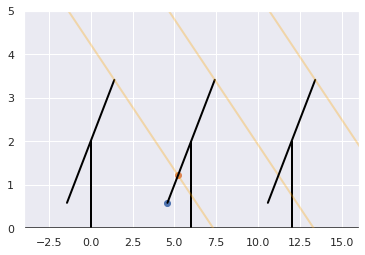

In [14]:
plt.axhline(y=0, color='black', linestyle='-')
psi = 30
bet = 45
alp = 45


plot_placa_(alp,0,psi)
plot_placa_(bet,1,psi)
plot_placa_(bet,2,psi)

plt.scatter(ratio_(bet,alp,psi)[1][0],ratio_(bet,alp,psi)[1][1])
plt.scatter(ratio_(bet,alp,psi)[2][0],ratio_(bet,alp,psi)[2][1])
print(potencia(bet,alp,psi))

plt.ylim([0,5])
plt.xlim([-4,A+2*s])
plt.show()

In [10]:
def plot_placa_(alpha,N,phi):
    alpha = alpha*conv
    phi = phi*conv
    plt.vlines(x=N*s, ymin=0, ymax=h, linewidth=2, color='black')
    
    x = np.linspace(-0.5*A*cos(alpha),0.5*A*cos(alpha),100)     
    y_ = tan(alpha)*x + h
    
    plt.plot(x+N*s,y_, linewidth=2, color='black')
    
    x_ = np.linspace(-100,100,100)
    
    plt.plot(x_ + N*s ,
             -tan(phi)*x_ + y_[-1] + tan(phi)*x[-1],
             linewidth=2, 
             color='orange',alpha = 0.3)

In [11]:


def plot_placa(alpha,N,phi):
    alpha = alpha*conv
    phi = phi*conv
    plt.vlines(x=A+N*s, ymin=0, ymax=h, linewidth=5, color='black')
    
    x = np.linspace(A-0.5*A*cos(alpha),A+0.5*A*cos(alpha),100)     
    y_ = tan(alpha)*x + h - A*tan(alpha)
    
    plt.plot(x+N*s,y_, linewidth=5, color='black')
    
    x_ = np.linspace(-100,100,100)
    
    plt.plot(x_ + N*s ,
             -tan(phi)*x_ + y_[-1] + tan(phi)*x[-1],
             linewidth=2, 
             color='orange',alpha = 0.3)


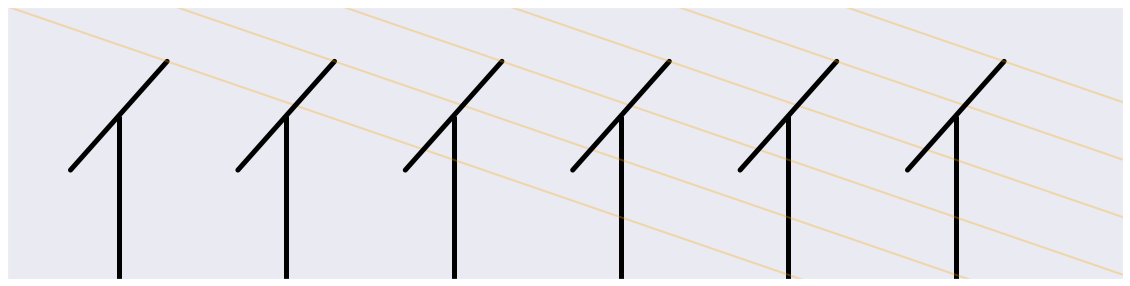

In [33]:
# angulos1 = [5,10,15,20,25,30]
# angulos2 = [30,30,30,30,30,30]
# h = 3
# p = 10
# fig = plt.figure(figsize = (20,5))
# for i,a in enumerate(angulos2):
#     plot_placa(a,i,p)
# plt.ylim([0,5])
# plt.xlim([0,A+len(angulos)*s])
# plt.xticks([])
# plt.yticks([])
# plt.savefig("antes.jpeg")
# plt.show() 

# fig = plt.figure(figsize = (20,5))
# for i,a in enumerate(angulos1):
#     plot_placa(a,i,p)
# plt.ylim([0,5])
# plt.xlim([0,A+len(angulos)*s])
# plt.xticks([])
# plt.yticks([])
# plt.savefig("despues.jpeg")
# plt.show()    

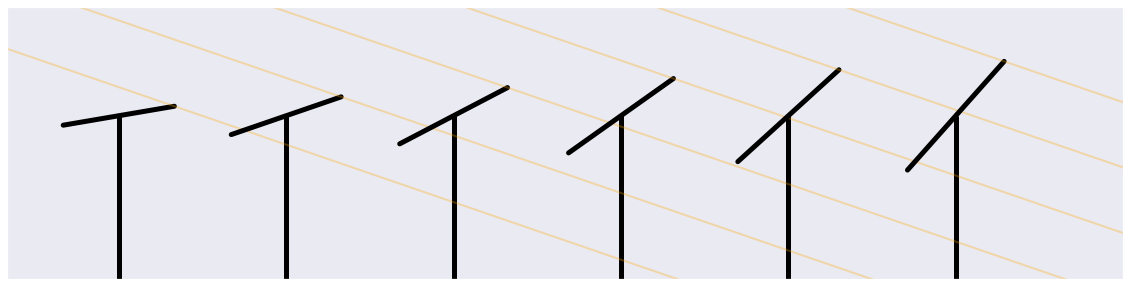

0 [0.0, 0]


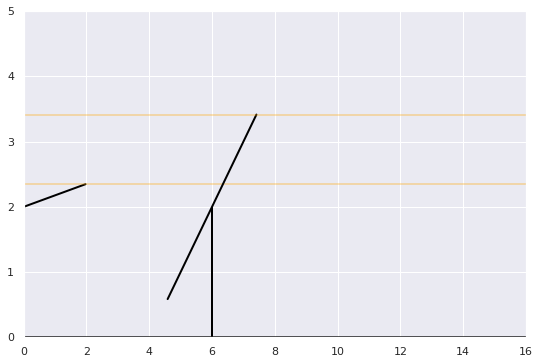

10 [0.08762526407493618, 0.06404978316693777]


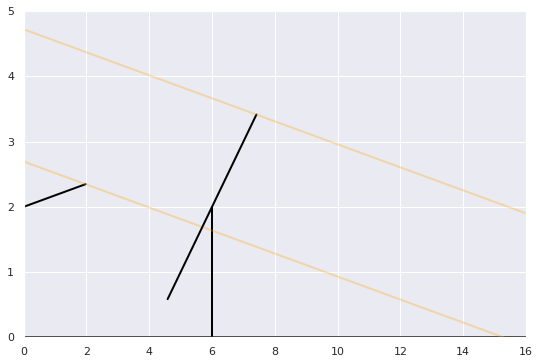

20 [1.2395052858807116, 0.6197526429403559]


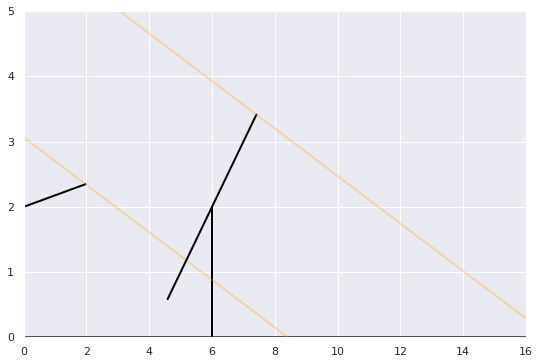

30 [2.353723566794941, 0.9154359586764416]


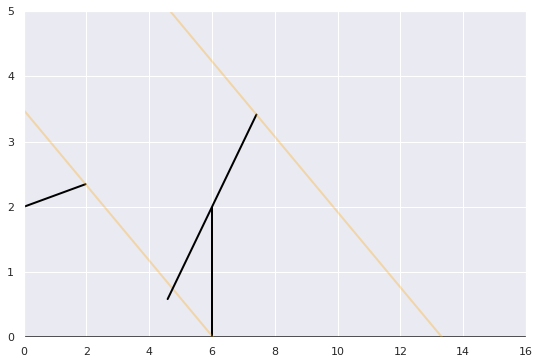

40 [3.064177772475912, 1]


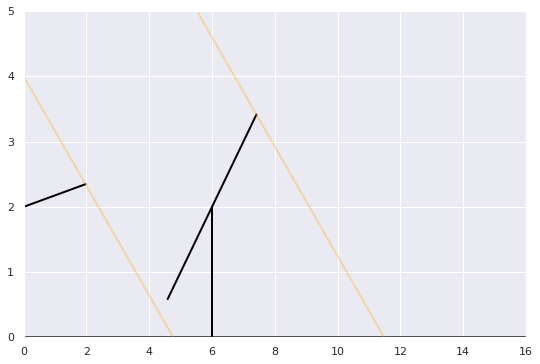

50 [3.464101615137754, 1]


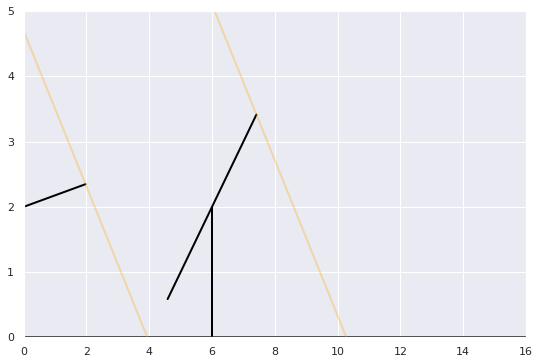

60 [3.7587704831436333, 1]


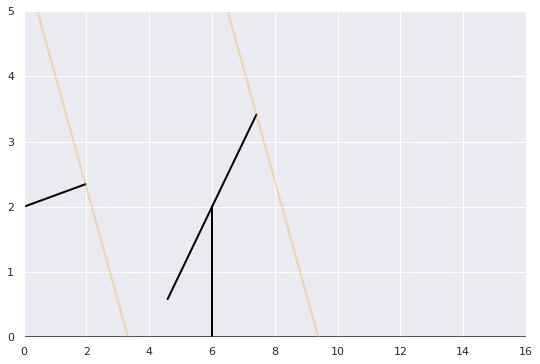

70 [3.939231012048832, 1]


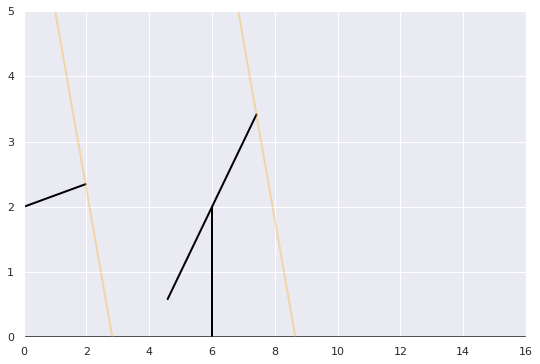

In [16]:
angulos = [10,45]#,15,20,25,30,35,40,45]
psi = np.arange(0,80,10)
P = []

for p in psi:
    plt.figure(figsize = (9,6))
    P.append(potencia(angulos[0],angulos[1],p))
    plt.axhline(y=0, color='black', linestyle='-')
    for i,a in enumerate(angulos):
        plot_placa_(a,i,p)
    plt.ylim([0,5])
    plt.xlim([0,A+len(angulos)*s])
    print(p,potencia(angulos[0],angulos[1],p))
    plt.show()    